##  The Data Analysis of titanic

In [81]:
# import the package
import pandas as pd
import matplotlib.pyplot as plt

## 加载CSV数据

In [82]:
titanic_data_list = pd.read_csv('titanic-data.csv')
print titanic_data_list.iloc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object


## 提出问题
- 乘客的经济地位与是否生还之间的关系？
- 乘客的出发港与是否生还之间的关系？
- 男性与女性之间的生还比例？
- 有哪些因素会让船上的人生还率更高？

## 修正数据类型

In [83]:
def parse_maybe_int(number):
    """
    Parse string to int.
    @param number: the data to pase.
    @return: the result of parsing.
    """
    if number == '':
        return None
    else:
        return int(number)
    
def parse_maybe_float(number):
    """
    Parse string to float.
    @param number: the data to pase.
    @return: the result of parsing.
    """
    if number == '':
        return None
    else:
        return float(number)
    
def parse_embarkation(embarkation):
    """
    Convert the abbreviation to the full name of embarkation.
    @param number: the abbreviation of embarkation.
    @return: the full name of embarkation.
    """
    if embarkation == 'C':
        return 'Cherbourg'
    elif embarkation == 'Q':
        return 'Queenstown'
    elif embarkation == 'S':
        return 'Southampton'
    else:
        return None

# The dictionary for the Ticket Class
pclass = {}
pclass['1'] = 'Upper'
pclass['2'] = 'Middle'
pclass['3'] = 'Lower'

# The dictionary for the sex
sex = {}
sex['1'] = 'male'
sex['2'] = 'female'

# The dictionary for the survival
survival = {}
survival['0'] = 'No'
survival['1'] = 'Yes'

## 探索数据

In [84]:
print titanic_data_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


从统计结果可以看出Age栏出现了数据的缺失，基于DataFrame数据的特点，这里不许要对数据进行进一步的处理。

In [85]:
def survived_percentage(key):
    """
    Calculate the survived percentage of different type
    """
    return titanic_data_list.groupby(key)['Survived'].mean()

def group_count(key):
    """
    Calculate the group count for the specified column
    """
    return titanic_data_list.groupby(key)['PassengerId'].count()

def draw_histogram(title, xData, xLabel):
    xticks = [i for i in range(len(xData))]
    
    plt.title(title)
    plt.ylabel('percentage')
    plt.xticks(xticks,xLabel)
    plt.bar(left = xticks,height = xData, width=0.2 )
    plt.show()
    
def draw_pie(key):
    a = titanic_data_list.groupby(key)['PassengerId'].count().plot(kind='pie', autopct='%.0f%%')
    plt.title("The rate of group count" + str(key))
    plt.show()
    
def describe(key, xLabel):
    xData = survived_percentage(key)
    group = group_count(key)
    
    indexList = xData.index.tolist()
    print "The survival rate of " + str(key)
    for a in indexList:
        print str(a) + ":" + str(xData[a]) + " in " + str(group[a])
    draw_pie(key)
    draw_histogram(key, xData, xLabel)

## 表中数据的基本统计参数

In [86]:
titanic_data_list.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


这里呢？为了方便将所有列都进行了统计学相关的计算，但是Pclass、PassengerId、SibSp、Parch列对我们是没有实际的意义的，可以忽略。由于没有总体数据，这里只能够以样本数据来推总体数据，
- Survived列：从表中推测全船的存活率为0.383838.
- Fare列：从表中推测全船人的平均收入为32.304208
- Age列：从表中推测全船人的平均年龄为29.699118

## 不同经济地位的乘客生还率

The survival rate of Pclass
1:0.62962962963 in 216
2:0.472826086957 in 184
3:0.242362525458 in 491


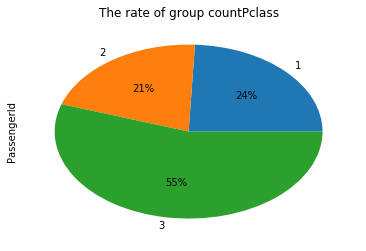

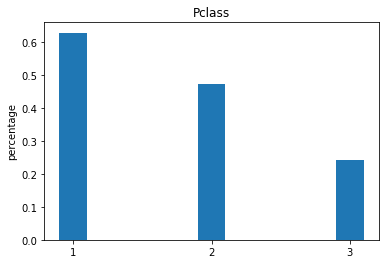

In [87]:
describe('Pclass', [1, 2, 3])

饼状图显示的是不同经济地位的人员数量比例；柱状体显示的是不同经济地位的人员存活率。从柱形图中可以看出生存率与经济地位成正相关。但是这里由于位于第3经济地位的样本数明显高于其它两个等级，相对来说第3经济地位的生存率相比前两个要更可信点。

## 不同出发港的乘客生还率

The survival rate of Embarked
C:0.553571428571 in 168
Q:0.38961038961 in 77
S:0.336956521739 in 644


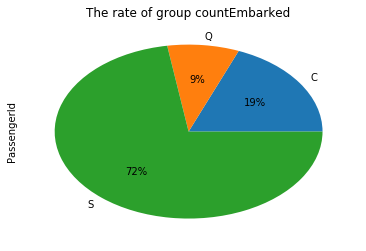

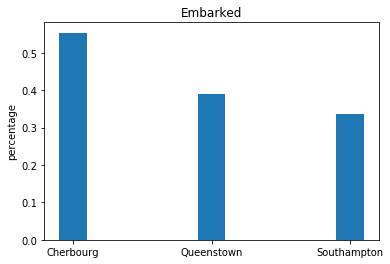

In [88]:
describe('Embarked', ['Cherbourg', 'Queenstown', 'Southampton'])

饼状图显示的是不同港口登陆的人员数量比例；柱状体显示的是不同港口登陆的人员存活率。从图一可以看出在Southampton上岸的人要明显高于其它另个，所以这个生存率的结果没有实际的借鉴意义。

## 男性与女性的生还率

The survival rate of Sex
female:0.742038216561 in 314
male:0.188908145581 in 577


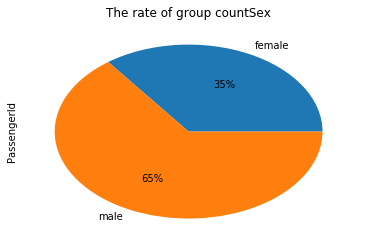

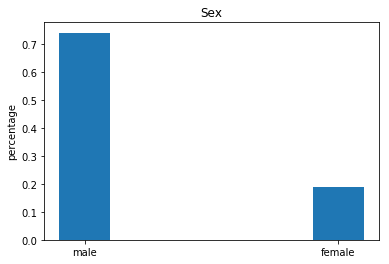

In [89]:
describe('Sex', ['male', 'female'])

饼状图显示的是不同性别的人员数量比例；柱状体显示的是不同性别的人员存活率。从图中可以看出不管是人数比例还是生存率，女性的值都远大于男性，所以这里认为性别与生存率之间相关。

## 缺陷：
- 样本量比较少，泰坦尼克号上有2000多人，但是实际的样本量却只提供了800多。而且提供的都是乘客的数据，但是船上还有船员，这对数据解析是有一定的偏差的。
- 年龄确实部分样本数据，会导致在预测年龄相关的数据时误差比较大。

## 结论
- 经济地位、性别这些因素影响乘客的生存率